In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow import keras

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

## **Loading the dataset**

Loading the data from my drive.

In [0]:
data = pd.read_csv('/content/drive/My Drive/Twitter Airline Reviews Sentiment Dataset/TwitterAirlineReviews.csv', parse_dates=['tweet_created'])

In [0]:
df = data.drop(['Unnamed: 0'], axis=1)

In [0]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
sentiment                          0
clean_text                        20
dtype: int64

In [0]:
df = data.dropna(subset=['clean_text'])

In [0]:
# Storing 'clean_text' and 'sentiment' columns in new variables
text_features = df['clean_text'].values
sentiment = df['sentiment'].values

In [0]:
# Splitting the data into test and train in the ratio of 1:4
xtrain, xtest, ytrain, ytest = train_test_split(text_features, sentiment, test_size=0.2)

## **Using CountVectorizer()**

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

1. Create an instance of the CountVectorizer class.
2. Call the fit() function in order to learn a vocabulary from one or more documents.
3. Call the transform() function on one or more documents as needed to encode each as a vector.

In [0]:
counter_vectorizer = CountVectorizer(analyzer = "word")
counter_vectorizer.fit(text_features)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
print(counter_vectorizer.vocabulary_)

{'dhepburn': 2997, 'said': 10100, 'plus': 8823, 'added': 140, 'commercials': 2200, 'experience': 3892, 'tacky': 11388, 'today': 11798, 'must': 7612, 'mean': 7185, 'need': 7725, 'take': 11404, 'another': 504, 'trip': 11981, 'really': 9443, 'aggressive': 227, 'blast': 1218, 'obnoxious': 8096, 'entertainment': 3667, 'guests': 4949, 'faces': 3957, 'amp': 439, 'little': 6735, 'recourse': 9501, 'big': 1151, 'bad': 894, 'thing': 11636, 'seriously': 10372, 'would': 13114, 'pay': 8549, 'flight': 4222, 'seats': 10290, 'playing': 8788, 'flying': 4291, 'va': 12477, 'yes': 13301, 'nearly': 7721, 'every': 3797, 'time': 11731, 'fly': 4279, 'vx': 12700, 'ear': 3433, 'worm': 13088, 'go': 4763, 'away': 840, 'missed': 7403, 'prime': 9035, 'opportunity': 8252, 'men': 7250, 'without': 13018, 'hats': 5072, 'parody': 8478, 'https': 5409, 'co': 2113, 'mwpg': 7625, 'grezp': 4893, 'well': 12857, 'amazing': 399, 'arrived': 655, 'hour': 5368, 'early': 3436, 'good': 4794, 'know': 6392, 'suicide': 11212, 'second': 

In [0]:
#Encoding xtrain and xtest data by using transform() method
xtrain_vect = counter_vectorizer.transform(xtrain)
xtest_vect = counter_vectorizer.transform(xtest)

In [0]:
# Performs linear dimensionality reduction by means of truncated singular value decomposition (SVD)
tsvd = TruncatedSVD(n_components=1000)
xtrain_scaled = tsvd.fit_transform(xtrain_vect)
xtest_scaled = tsvd.fit_transform(xtest_vect)

In [0]:
Classifiers  = [LogisticRegression(max_iter=10000),  GaussianNB(),KNeighborsClassifier(3)]

In [0]:
Accuracy=[]
Model=[]
for clf in Classifiers:
  fit = clf.fit(xtrain_vect.todense(), ytrain)
  pred = fit.predict(xtest_vect.todense())
  accuracy = accuracy_score(pred, ytest)
  Accuracy.append(accuracy)
  Model.append(clf.__class__.__name__)
  print('Accuracy of '+clf.__class__.__name__+' is '+str(np.round(accuracy*100, 2))+'%')

Accuracy of LogisticRegression is 83.07%
Accuracy of GaussianNB is 59.85%
Accuracy of KNeighborsClassifier is 64.09%


Comparing the performances of the Classifiers 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0.5, 1.0, 'Classifier Accuracies')

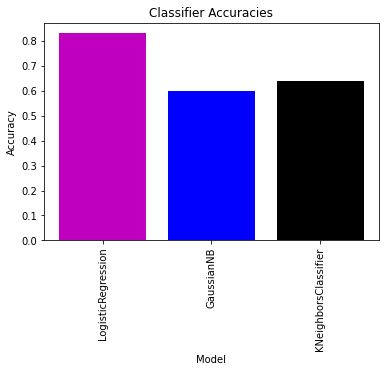

In [0]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='mbk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

## **Using TfidfVectorizer()**

 TF-IDF is the most popular method . This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents

In [0]:
tfidf_vectorizer = TfidfVectorizer(analyzer ='word')
tfidf_vectorizer.fit(text_features)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
xtrain_vect1 = tfidf_vectorizer.transform(xtrain)
xtest_vect1 = tfidf_vectorizer.transform(xtest)

In [0]:
tsvd = TruncatedSVD(n_components=13)
xtrain_scaled = tsvd.fit_transform(xtrain_vect1)
xtest_scaled = tsvd.fit_transform(xtest_vect1)

Building the model

In [0]:
model = keras.models.Sequential([
        keras.layers.Dense(40, input_shape=[13,], activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
]) 

In [0]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [0]:
model.fit(xtrain_scaled, ytrain, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 0.5864 - accuracy: 0.6990 - val_loss: 0.5207 - val_accuracy: 0.7307
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7414 - val_loss: 0.5099 - val_accuracy: 0.7375
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 0.5012 - accuracy: 0.7529 - val_loss: 0.5085 - val_accuracy: 0.7410
Epoch 4/10
256/256 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7604 - val_loss: 0.5050 - val_accuracy: 0.7603
Epoch 5/10
256/256 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7657 - val_loss: 0.5079 - val_accuracy: 0.7415
Epoch 6/10
256/256 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7650 - val_loss: 0.5045 - val_accuracy: 0.7595
Epoch 7/10
256/256 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7661 - val_loss: 0.5105 - val_accuracy: 0.7529
Epoch 

In [0]:
epoch = model.history.epoch
history = model.history.history

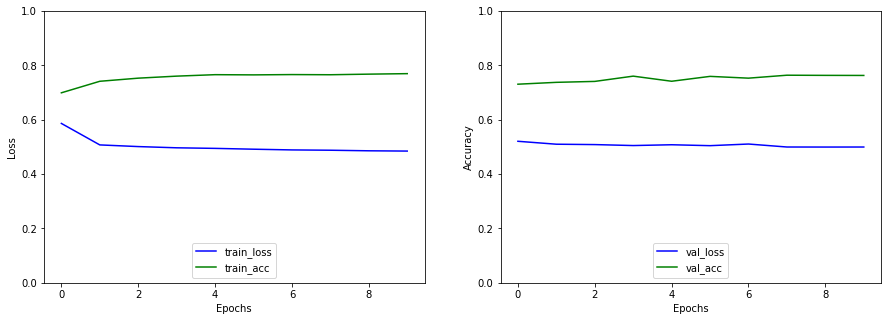

In [0]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.ylim([0.0, 1.0])
plt.plot(epoch, history['loss'], 'b', epoch, history['accuracy'], 'g')
plt.legend(['train_loss', 'train_acc'], loc='lower center')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(122)
plt.ylim([0.0, 1.0])
plt.plot(epoch, history['val_loss'], 'b', epoch, history['val_accuracy'], 'g')
plt.legend(['val_loss', 'val_acc'], loc ='lower center')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()